In [1]:
# Libraries

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt

# Import/export

import urllib.request
import re
import csv

In [2]:
# Variables

folder_name = 'C:/Users/j.petit/Documents/Python/0000_donnees/export/via API/'
file_name = "equipement.csv"
file_path = folder_name + file_name
export_dc = "https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/exports/csv"


# Mise à jour du fichier dans le dossier
#urllib.request.urlretrieve(export_dc, file_path)


# Transformation du fichier du dossier en dataframe

print("Import de df")
df = pd.read_csv(file_path, sep=";", low_memory=False, dtype="str")
print(len(df))
df.sample(2)

Import de df
333038


,equip_numero,inst_numero,inst_enqu_date,inst_nom,inst_siret,inst_adresse,inst_cp,new_name,new_code,inst_part_type_filter,inst_uai,inst_acc_handi_type,inst_trans_type,inst_obs,inst_date_etat,inst_date_creation,inst_hs_bool,epci_code,dep_code,dep_nom,reg_code,reg_nom,epci_nom,code_bdv,lib_bdv,arr_code,arr_name,dens_niveau,dens_lib,dep_code_filled,aca_nom,zrr_simp,equip_nom,equip_type_name,equip_coordonnees,equip_prop_nom,equip_prop_type,equip_propsec_type,equip_gest_type,equip_cogest_type,equip_dsp,equip_ouv_public_bool,equip_erp_type,equip_erp_cat,equip_homo_date,equip_homo_periode,equip_service_date,equip_service_periode,equip_travaux_date,equip_travaux_periode,equip_travaux_type,equip_energie,equip_nature,equip_sol,equip_long,equip_larg,equip_haut,equip_surf,equip_eclair,equip_trib_nb,equip_vest_sport,equip_vest_ens,equip_douche,equip_sanit,equip_loc_type,equip_conf_type,equip_acces_handi_mobilite,equip_acces_handi_sensoriel,equip_pdesi_pdipr,equip_bassin_long,equip_bassin_larg,equip_bassin_surf,equip_bassin_min,equip_bassin_max,equip_piste_long,equip_sae_haut,equip_sae_surf,equip_sae_couloir,equip_pasdetir,equip_url,equip_utilisateur,equip_acc_libre,equip_saison,equip_obs,equip_type_famille,equip_type_code,equip_rnb,inst_acc_handi_bool,inst_trans_bool,inst_part_bool,equip_loc_bool,equip_pmr_vest,equip_pmr_acc,equip_pmr_aire,equip_pmr_chem,equip_pmr_douche,equip_pmr_sanit,equip_pmr_trib,equip_pshs_aire,equip_pshs_chem,equip_pshs_sanit,equip_pshs_sign,equip_pshs_trib,equip_pshs_vest,equip_x,equip_y,inst_part_type,equip_qpv,equip_qpv_200m,categorie
9779,E001I682390001,I682390001,2025-03-31,Circuits de randonnées circulaires,NaN,NaN,68290,Oberbruck,68239,NaN,NaN,NaN,NaN,NaN,2024-06-21,2006-10-01,false,246800676,68,Haut-Rhin,44,Grand Est,CC de la Vallée de la Doller et du Soultzbach,68201,Masevaux-Niederbruck,686,Thann-Guebwiller,5,Bourgs ruraux,68,Académie de Strasbourg,NC - Commune non classée,Tour du grand Neuweïer - Anneau rouge,Boucle de randonnée,"47.80766, 6.93945",NaN,Commune,NaN,Association(s),NaN,false,false,NaN,NaN,NaN,NaN,1999,1995-2004,NaN,NaN,NaN,NaN,Site naturel aménagé,Surface naturelle,3000.0,NaN,NaN,NaN,false,0,0,0,false,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""Individuel(s),famille(s)"", ""Clubs sportifs,c...",true,false,NaN,Divers équipements Sports de nature,3012,NaN,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,47.80766,6.93945,NaN,NaN,NaN,NaN
121520,E004I452340078,I452340078,2025-03-31,STADE ORLEANS LA SOURCE ET CRJS,NaN,7 Rue de Beaumarché,45000,Orléans,45234,Complexe sportif,NaN,"[""Handicap moteur""]",NaN,Centre de Préparation aux Jeux (CPJ) (Stade de...,2024-02-12,2005-08-02,false,244500468,45,Loiret,24,Centre-Val de Loire,Orléans Métropole,45234,Orléans,452,Orléans,1,Grands centres urbains,45,Académie d'Orléans-Tours,NC - Commune non classée,Terrain de foot (gazonné poussin),Terrain de football,"47.8436493572, 1.94441028183",Mairie,Commune,NaN,Commune,NaN,false,true,"[""PA"", ""X""]",5,NaN,NaN,1976,1975-1984,NaN,NaN,NaN,NaN,Découvert,Gazon naturel,70.0,41.0,NaN,2450.0,true,0,12,2,true,true,"[""Reception/accueil"", ""Bureau(x) club(s)"", ""Bu...",NaN,"Sanitaires,Vestiaires",Sanitaires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""Clubs sportifs,comités,ligues,fédérations"", ...",false,false,NaN,Terrain de grands jeux,2802,NaN,true,false,true,true,true,false,false,false,false,true,false,false,false,true,false,false,false,47.8436493572,1.94441028183,"[""Complexe sportif""]",NaN,NaN,structurant


In [3]:
# Import des données DPE
# https://data.ademe.fr/datasets/dpe01tertiaire/full?_d_j9ol0fwjqckyf49vr29nknbu_secteur_activite_eq=X%20%3A%20%C3%89tablissements%20sportifs%20couverts

file_dpe = "dpe01tertiaire.xlsx"

print("Import de df_dpe")
df_dpe = pd.read_excel(file_dpe)
print(len(df_dpe))
df_dpe.sample(2)

Import de df_dpe
1897


,numero_dpe,date_derniere_modification_dpe,date_visite_diagnostiqueur,date_etablissement_dpe,date_reception_dpe,date_fin_validite_dpe,numero_dpe_remplace,numero_dpe_immeuble_associe,id_rnb,provenance_id_rnb,numero_immatriculation_copropriete,modele_dpe,version_dpe,methode_dpe,categorie_erp,secteur_activite,etiquette_dpe,etiquette_ges,annee_construction,periode_construction,surface_shon,surface_utile,nombre_occupant,adresse_ban,numero_voie_ban,nom_rue_ban,nom_commune_ban,code_postal_ban,code_insee_ban,code_departement_ban,code_region_ban,identifiant_ban,coordonnee_cartographique_x_ban,coordonnee_cartographique_y_ban,score_ban,statut_geocodage,adresse_brut,nom_commune_brut,code_postal_brut,numero_etage_appartement,nom_residence,complement_adresse_batiment,complement_adresse_logement,conso_kwhep_m2_an,emission_ges_kg_co2_m2_an,type_energie_principale_chauffage,type_energie_n1,type_usage_energie_n1,conso_ep_energie_n1,conso_ef_energie_n1,frais_annuel_energie_n1,annee_releve_conso_energie_n1,type_energie_n2,type_usage_energie_n2,conso_ep_energie_n2,conso_ef_energie_n2,frais_annuel_energie_n2,annee_releve_conso_energie_n2,type_energie_n3,type_usage_energie_n3,conso_ep_energie_n3,conso_ef_energie_n3,frais_annuel_energie_n3,annee_releve_conso_energie_n3
257,2318T3295906Z,2024-12-30,2023-10-01,2023-10-01,2023-10-02,2033-09-30,NaN,NaN,K7PDVJMJRFVB,Reprise RNB,NaN,DPE 2006 tertiaire et ERP,2.3,dpe tertiaire vierge,5ème Catégorie,X : Établissements sportifs couverts,NaN,NaN,NaN,avant 1948,104.7,100.0,0.0,4 Rue du Château 18100 Vierzon,4,Rue du Château,Vierzon,18100.0,18279,18,24.0,18279_0780_00004,629717.22,6680692.61,0.56,adresse géocodée ban à l'adresse,4 rue du chateau,VIERZON,18100,0.0,NaN,2310022-GBA BERRY LOIRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,2395T3515523T,2023-10-26,2023-10-03,2023-10-17,2023-10-18,2033-10-16,NaN,NaN,NaN,NaN,NaN,DPE 2006 tertiaire et ERP,2.3,dpe tertiaire facture,5ème Catégorie,X : Établissements sportifs couverts,F,B,2005.0,2001-2005,283.4,100.0,0.0,9 Rue René Couzinet 95240 Cormeilles-en-Parisis,9,Rue René Couzinet,Cormeilles-en-Parisis,95240.0,95176,95,11.0,95176_0382_00009,641515.31,6873627.95,0.56,adresse géocodée ban à l'adresse,"9, rue René Couzinet","CORMEILLES EN PARISIS, France",95240,0.0,NaN,23-09-TRAVERS-1210,NaN,390.5,10.9,NaN,Électricité,périmètre de l'usage inconnu,121702.2,52914.0,15349.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EXPLO

In [4]:
# Avec numéro RNB
len(df_dpe[df_dpe.id_rnb.notna()])

494

In [5]:
rnb_list = list(df_dpe.id_rnb.unique())

rnb_list.remove(np.nan)

df_temp = df[df.equip_rnb.isin(rnb_list)]

print("Equipement avec une liaison :", len(df_temp))

df_temp.equip_type_famille.value_counts()

Equipement avec une liaison : 200


equip_type_famille
Equipement d'activités de forme et de santé    95
Salle ou terrain spécialisé                    52
Salle multisports                              18
Salle de combat                                10
Bassin de natation                              8
Bowling                                         5
Court de tennis                                 5
Salle non spécialisée                           3
Structure Artificielle d'Escalade               1
Equipement d'athlétisme                         1
Pas de tir                                      1
Boulodrome                                      1
Name: count, dtype: int64

In [6]:
# Création de df_eco
df_eco = df_temp.merge(df_dpe, right_on="id_rnb", left_on="equip_rnb")

# Colonne a séléctionner
colonne = "conso_kwhep_m2_an"

# On enlève les valeures nulles
df_eco = df_eco[df_eco[colonne].notna()]
print("Avec consomation :")
print(len(df_eco))

# On enlèves les valeures faibles
df_eco = df_eco[df_eco[colonne] > 1]
print("Avec consomation :")
print(len(df_eco))

display(df_eco.sample(2))

Avec consomation :
150
Avec consomation :
146


,equip_numero,inst_numero,inst_enqu_date,inst_nom,inst_siret,inst_adresse,inst_cp,new_name,new_code,inst_part_type_filter,inst_uai,inst_acc_handi_type,inst_trans_type,inst_obs,inst_date_etat,inst_date_creation,inst_hs_bool,epci_code,dep_code,dep_nom,reg_code,reg_nom,epci_nom,code_bdv,lib_bdv,arr_code,arr_name,dens_niveau,dens_lib,dep_code_filled,aca_nom,zrr_simp,equip_nom,equip_type_name,equip_coordonnees,equip_prop_nom,equip_prop_type,equip_propsec_type,equip_gest_type,equip_cogest_type,equip_dsp,equip_ouv_public_bool,equip_erp_type,equip_erp_cat,equip_homo_date,equip_homo_periode,equip_service_date,equip_service_periode,equip_travaux_date,equip_travaux_periode,equip_travaux_type,equip_energie,equip_nature,equip_sol,equip_long,equip_larg,equip_haut,equip_surf,equip_eclair,equip_trib_nb,equip_vest_sport,equip_vest_ens,equip_douche,equip_sanit,equip_loc_type,equip_conf_type,equip_acces_handi_mobilite,equip_acces_handi_sensoriel,equip_pdesi_pdipr,equip_bassin_long,equip_bassin_larg,equip_bassin_surf,equip_bassin_min,equip_bassin_max,equip_piste_long,equip_sae_haut,equip_sae_surf,equip_sae_couloir,equip_pasdetir,equip_url,equip_utilisateur,equip_acc_libre,equip_saison,equip_obs,equip_type_famille,equip_type_code,equip_rnb,inst_acc_handi_bool,inst_trans_bool,inst_part_bool,equip_loc_bool,equip_pmr_vest,equip_pmr_acc,equip_pmr_aire,equip_pmr_chem,equip_pmr_douche,equip_pmr_sanit,equip_pmr_trib,equip_pshs_aire,equip_pshs_chem,equip_pshs_sanit,equip_pshs_sign,equip_pshs_trib,equip_pshs_vest,equip_x,equip_y,inst_part_type,equip_qpv,equip_qpv_200m,categorie,numero_dpe,date_derniere_modification_dpe,date_visite_diagnostiqueur,date_etablissement_dpe,date_reception_dpe,date_fin_validite_dpe,numero_dpe_remplace,numero_dpe_immeuble_associe,id_rnb,provenance_id_rnb,numero_immatriculation_copropriete,modele_dpe,version_dpe,methode_dpe,categorie_erp,secteur_activite,etiquette_dpe,etiquette_ges,annee_construction,periode_construction,surface_shon,surface_utile,nombre_occupant,adresse_ban,numero_voie_ban,nom_rue_ban,nom_commune_ban,code_postal_ban,code_insee_ban,code_departement_ban,code_region_ban,identifiant_ban,coordonnee_cartographique_x_ban,coordonnee_cartographique_y_ban,score_ban,statut_geocodage,adresse_brut,nom_commune_brut,code_postal_brut,numero_etage_appartement,nom_residence,complement_adresse_batiment,complement_adresse_logement,conso_kwhep_m2_an,emission_ges_kg_co2_m2_an,type_energie_principale_chauffage,type_energie_n1,type_usage_energie_n1,conso_ep_energie_n1,conso_ef_energie_n1,frais_annuel_energie_n1,annee_releve_conso_energie_n1,type_energie_n2,type_usage_energie_n2,conso_ep_energie_n2,conso_ef_energie_n2,frais_annuel_energie_n2,annee_releve_conso_energie_n2,type_energie_n3,type_usage_energie_n3,conso_ep_energie_n3,conso_ef_energie_n3,frais_annuel_energie_n3,annee_releve_conso_energie_n3
116,E004I773330010,I773330010,2025-03-31,DYNAMIC FITNESS,NaN,2 IMPASSE DE CHEROY,77140,Nemours,77333,NaN,NaN,"[""Handicap moteur""]",NaN,NaN,2024-04-24,2016-03-23,NaN,200023240,77,Seine-et-Marne,11,Île-de-France,CC Pays de Nemours,77333,Nemours,774,Fontainebleau,2,Centres urbains intermédiaires,77,Académie de Créteil,NC - Commune non classée,SALLE DE MUSCULATION,Salle de musculation/cardiotraining,"48.26023, 2.72072",NaN,Etablissement privé commercial,NaN,Etablissement privé commercial,NaN,false,true,"[""X""]",4,NaN,NaN,2011,A partir de 2005,NaN,NaN,NaN,NaN,Intérieur,Parquet,14.0,10.0,3.0,140.0,true,0,2,0,true,true,"[""Reception/accueil"", ""Bureau(x) club(s)"", ""Bu...","[""Sauna""]","Accueil,Aire de jeu,Cheminements,Douches,Sanit...",Sanitaires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.dynamicfitness.fr,"[""Individuel(s),famille(s)"", ""Clubs sportifs,c...",false,false,NaN,Equipement d'activités de forme et de santé,802,HH9MPAJC13B5,true,false,false,true,true,true,true,true,true,true,false,false,false,true,false,false,false,48.26023,2.72072,NaN,NaN,NaN,NaN,2277T0996806H,2024-12-30,2022-04-18,2022-05-08,2022-05-09,2032-05-07,NaN

# PREMIER GRAPH

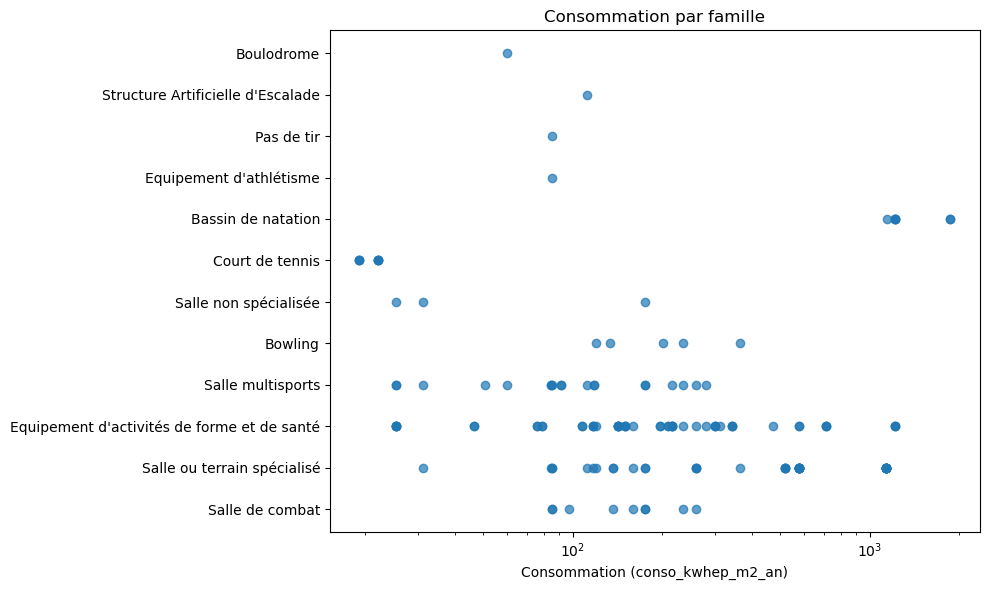

In [7]:
# Petite boucle pour associer chaque type de bâtiment à un entier... c'est pas ouf mais ça marche
types = df_eco['equip_type_famille'].unique()
type_to_y = {t: i for i, t in enumerate(types)}
y_values = df_eco['equip_type_famille'].map(type_to_y)

# Tracer
plt.figure(figsize=(10, 6))
plt.scatter(df_eco[colonne], y_values, alpha=0.7)

# Customiser l'axe y avec les noms
plt.yticks(ticks=range(len(types)), labels=types)

plt.xlabel('Consommation ('+ colonne +')')
plt.xscale('log')

plt.title('Consommation par famille')
plt.tight_layout()

plt.show()

# GRAPH CLASSE

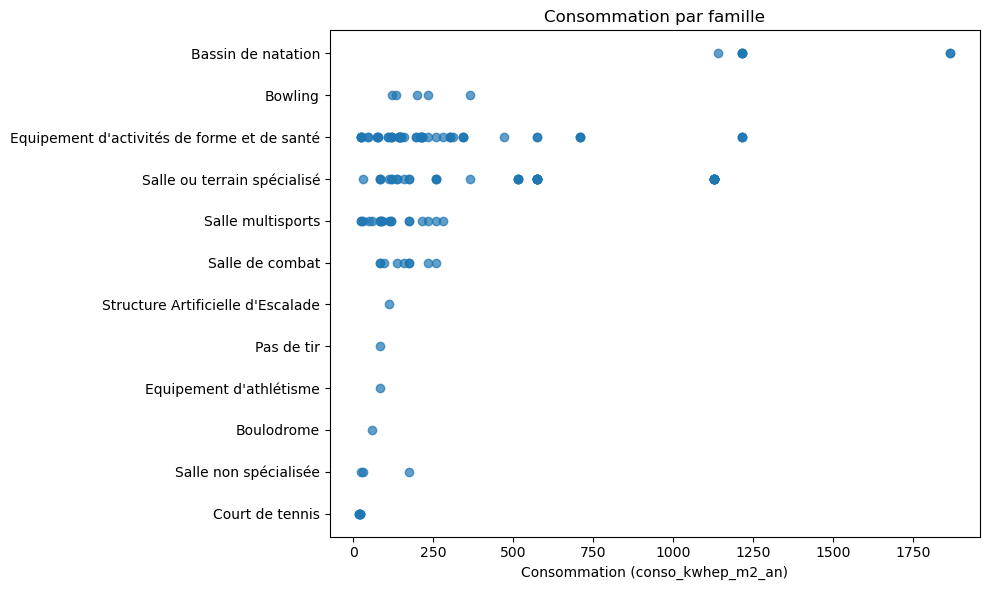

In [8]:
# Ordre perso pour voir un peu mieux à but d'export
ordre_personnalise = [
    'Court de tennis',
    'Salle non spécialisée',
    'Boulodrome',
    "Equipement d'athlétisme",
    'Pas de tir',
    "Structure Artificielle d'Escalade",
    'Salle de combat',
    'Salle multisports',
    'Salle ou terrain spécialisé',
    "Equipement d'activités de forme et de santé",
    'Bowling',
    'Bassin de natation'
]

# Associer chaque type de bâtiment à un entier comme au dessus
# Auparavent types = df_eco['equip_type_famille'].unique()
type_to_y = {t: i for i, t in enumerate(ordre_personnalise)}
y_values = df_eco['equip_type_famille'].map(type_to_y)

# Tracer
plt.figure(figsize=(10, 6))
plt.scatter(df_eco[colonne], y_values, alpha=0.7)

# Customiser l'axe y avec les noms
plt.yticks(ticks=range(len(ordre_personnalise)), labels=ordre_personnalise)

plt.xlabel('Consommation ('+ colonne +')')
#plt.xscale('log')

plt.title('Consommation par famille')
plt.tight_layout()

plt.show()